In [1]:
import sys
import os
# Add the project root directory to Python path
project_root = os.path.dirname(os.getcwd())
if project_root not in sys.path:
    sys.path.append(project_root)

import pandas as pd
from simulator.motor import Motor
from simulator.state import MotorHiddenState
from simulator.config import DEFAULT_CONFIG

state = MotorHiddenState(
    bearing_health=1.0,
    load_factor=1.2,
    misalignment=0.1,
    friction_coeff=DEFAULT_CONFIG["base_friction"]
)

motor = Motor(state, DEFAULT_CONFIG)

records = []

for t in range(3000):
    sensors = motor.step()
    sensors["time"] = t
    records.append(sensors)

df = pd.DataFrame(records)
df

,temperature,vibration,current,rpm,bearing_health,time
0,25.619514,0.850747,NaN,1798.274872,0.999868,0
1,24.907907,0.665705,11.414830,1795.461077,0.999736,1
2,24.055432,1.021587,12.416387,1787.836483,0.999604,2
3,24.898344,0.853499,12.301316,1790.429193,0.999472,3
4,25.181292,0.602368,11.854778,1793.751374,0.999340,4
...,...,...,...,...,...,...
2995,27.972369,2.244575,17.953675,1773.643809,0.604528,2995
2996,28.476100,2.464911,17.740894,1785.393114,0.604396,2996
2997,28.697514,2.314091,18.463156,1792.724389,0.604264,2997
2998,27.507860,2.286038,17.681650,1798.286445,0.604132,2998


In [2]:
df.isna().sum()


temperature       29
vibration         34
current           24
rpm               20
bearing_health     0
time               0
dtype: int64

# Checking the sanity of the data

In [3]:
import matplotlib.pyplot as plt


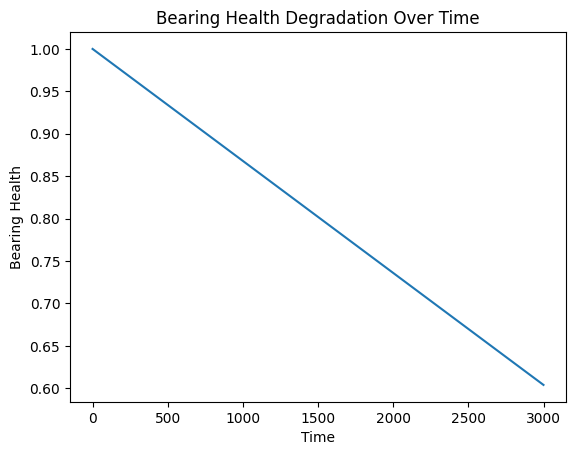

In [10]:
plt.figure()
plt.plot(df["time"], df["bearing_health"])
plt.xlabel("Time")
plt.ylabel("Bearing Health")
plt.title("Bearing Health Degradation Over Time")
plt.show()


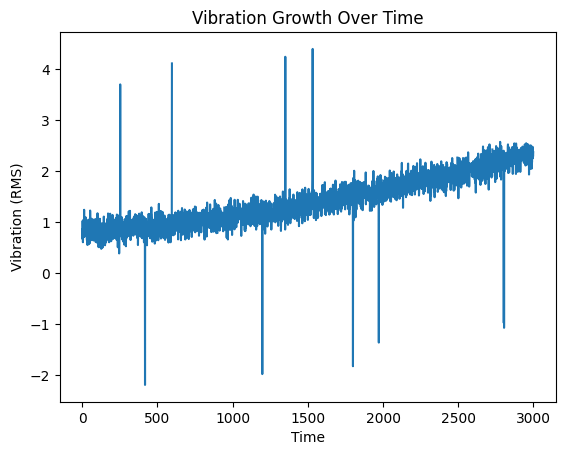

In [5]:
plt.figure()
plt.plot(df["time"], df["vibration"])
plt.xlabel("Time")
plt.ylabel("Vibration (RMS)")
plt.title("Vibration Growth Over Time")
plt.show()


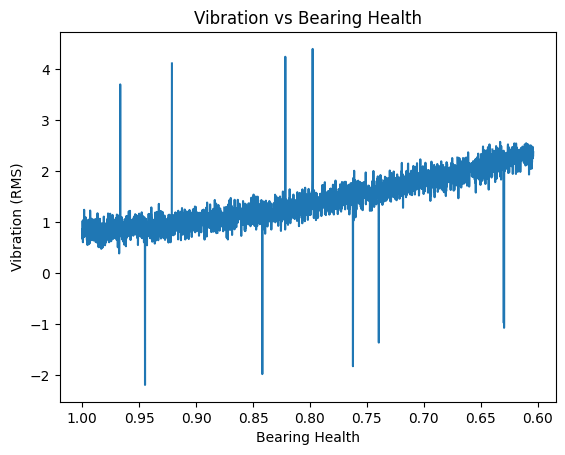

In [6]:
plt.figure()
plt.plot(df["bearing_health"], df["vibration"])
plt.xlabel("Bearing Health")
plt.ylabel("Vibration (RMS)")
plt.title("Vibration vs Bearing Health")
plt.gca().invert_xaxis()  # optional: healthy → failed (left to right)
plt.show()


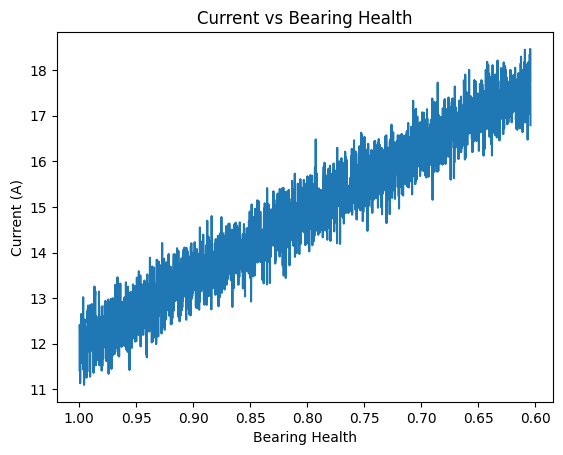

In [7]:
plt.figure()
plt.plot(df["bearing_health"], df["current"])
plt.xlabel("Bearing Health")
plt.ylabel("Current (A)")
plt.title("Current vs Bearing Health")
plt.gca().invert_xaxis()
plt.show()


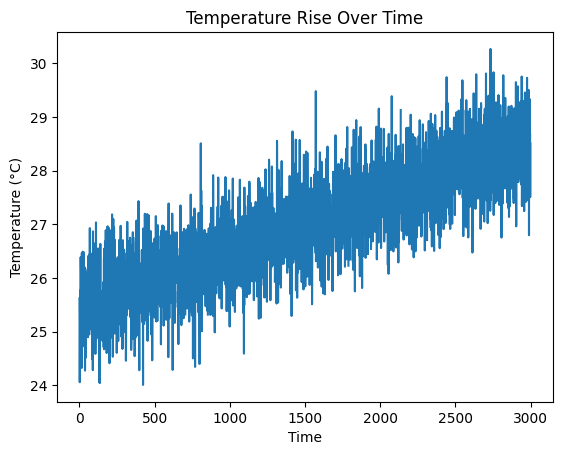

In [8]:
plt.figure()
plt.plot(df["time"], df["temperature"])
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Rise Over Time")
plt.show()


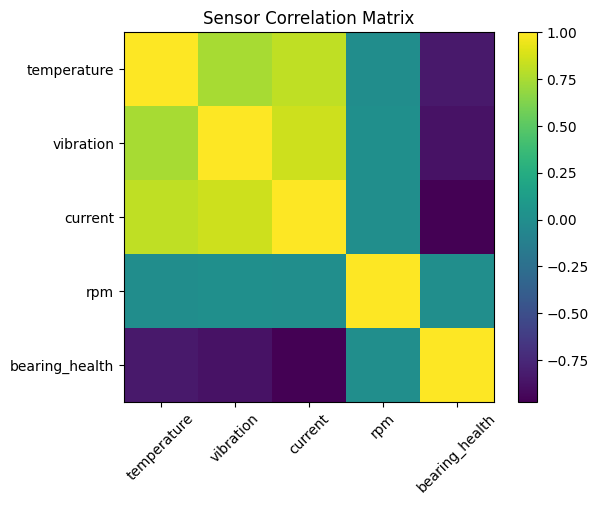

In [9]:
import numpy as np

corr = df[["temperature", "vibration", "current", "rpm", "bearing_health"]].corr()

plt.figure()
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Sensor Correlation Matrix")
plt.show()


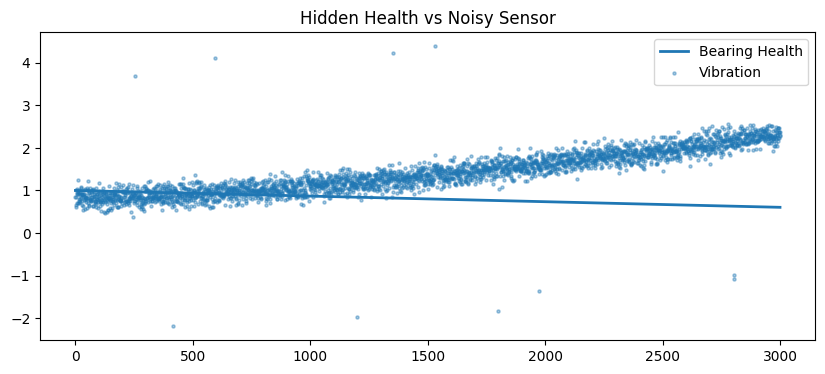

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df["time"], df["bearing_health"], label="Bearing Health", linewidth=2)
plt.scatter(df["time"], df["vibration"], s=5, alpha=0.4, label="Vibration")
plt.legend()
plt.title("Hidden Health vs Noisy Sensor")
plt.show()


In [12]:
import pandas as pd
from simulator.factory import FactorySimulator

factory = FactorySimulator(num_motors=5)

records = []

for t in range(3000):
    step_records = factory.step()
    records.extend(step_records)

df = pd.DataFrame(records)
df.head()


,temperature,vibration,current,rpm,bearing_health,time,motor_id
0,26.100330,0.466719,8.765901,1797.568581,0.999910,0,0
1,25.468421,0.803702,10.794845,1812.081689,0.999883,0,1
2,25.240905,0.616404,10.362884,1803.007330,0.999851,0,2
3,24.020387,0.723477,11.935081,1796.098416,0.999816,0,3
4,25.520901,0.800110,12.800003,1800.148086,0.999775,0,4


In [13]:
df.groupby("motor_id")["bearing_health"].last()


motor_id
0    0.73000
1    0.64810
2    0.55384
3    0.44668
4    0.32608
Name: bearing_health, dtype: float64

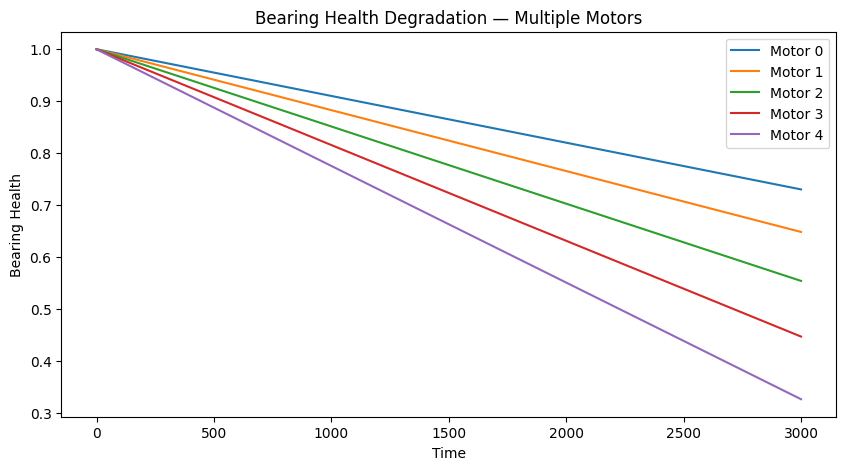

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

for motor_id in df["motor_id"].unique():
    subset = df[df["motor_id"] == motor_id]
    plt.plot(subset["time"], subset["bearing_health"], label=f"Motor {motor_id}")

plt.xlabel("Time")
plt.ylabel("Bearing Health")
plt.title("Bearing Health Degradation — Multiple Motors")
plt.legend()
plt.show()


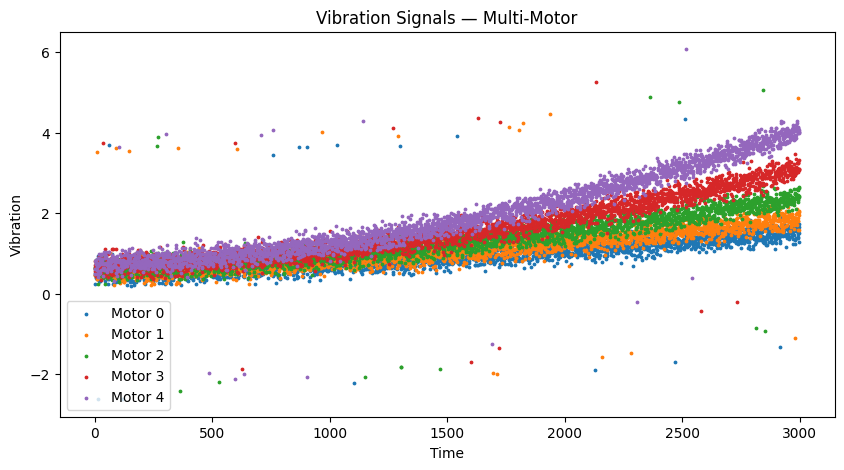

In [15]:
plt.figure(figsize=(10,5))

for motor_id in df["motor_id"].unique():
    subset = df[df["motor_id"] == motor_id]
    plt.scatter(subset["time"], subset["vibration"], s=3, label=f"Motor {motor_id}")

plt.xlabel("Time")
plt.ylabel("Vibration")
plt.title("Vibration Signals — Multi-Motor")
plt.legend()
plt.show()
